In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import ast
import xarray as xr
import matplotlib.pyplot as plt
from src.data_generator import *
from src.train import *

In [24]:
args = load_args('../nn_configs/B/42-resnet_cmip.yml')

In [32]:
args['train_years'] = ['2000', '2000']
args['valid_years'] = ['2001', '2001']
args['test_years'] = ['2002', '2002']

In [34]:
args['cmip_dir'] = '/data/stephan/WeatherBench/CMIP/MPI-ESM/5.625deg/'

In [36]:
dg_train1, dg_valid1, dg_test1 = load_data(**args)

DG start 18:24:22.115990
DG normalize 18:24:22.135941
DG load 18:24:26.886845
Loading data into RAM
DG done 18:24:31.247100
DG start 18:24:31.247345
DG normalize 18:24:31.267263
DG load 18:24:31.273878
Loading data into RAM
DG done 18:24:34.498328
DG start 18:24:34.498693
DG normalize 18:24:34.517753
DG load 18:24:34.528838
Loading data into RAM
DG done 18:24:37.331207
Mean = <xarray.DataArray 'z' (level: 15)>
array([ 1.00751284e+05,  5.39614420e+04,  1.37286684e+04,  2.20535985e+02,
        2.51837688e+02,  2.72880590e+02,  1.49779122e+01,  6.90090338e+00,
        1.43022812e+00, -7.11210987e-02,  1.24802876e-01, -5.02551735e-02,
        3.37078289e-01,  3.79497583e+02,  0.00000000e+00])
Coordinates:
  * level        (level) float64 250.0 500.0 850.0 250.0 ... 850.0 1.0 1.0 1.0
    level_names  (level) <U9 'z_250' 'z_500' 'z_850' ... 'orography' 'lat2d'; Std = <xarray.DataArray 'z' (level: 15)>
array([5.48829105e+03, 3.20596656e+03, 1.33347345e+03, 8.62047865e+00,
       1.32299774e+0

In [37]:
args['cmip_dir'] = '/data/stephan/WeatherBench/CMIP/MIROC6/5.625deg/'

In [38]:
dg_train2, dg_valid2, dg_test2 = load_data(**args)

DG start 18:24:57.674809
DG normalize 18:24:57.691460
DG load 18:24:58.148188
Loading data into RAM
DG done 18:24:58.838304
DG start 18:24:58.838556
DG normalize 18:24:58.856053
DG load 18:24:58.863329
Loading data into RAM
DG done 18:24:59.722488
DG start 18:24:59.722854
DG normalize 18:24:59.744623
DG load 18:24:59.752200
Loading data into RAM
DG done 18:25:00.588440
Mean = <xarray.DataArray 'z' (level: 15)>
array([ 1.00622828e+05,  5.37757025e+04,  1.36190654e+04,  2.19914501e+02,
        2.52147621e+02,  2.75207206e+02,  1.34681897e+01,  6.35267338e+00,
        1.11280969e+00,  3.19886552e-01, -3.32396817e-02, -3.85414295e-01,
        3.37078289e-01,  3.79497583e+02,  0.00000000e+00])
Coordinates:
  * level        (level) float64 250.0 500.0 850.0 250.0 ... 850.0 1.0 1.0 1.0
    level_names  (level) <U9 'z_250' 'z_500' 'z_850' ... 'orography' 'lat2d'; Std = <xarray.DataArray 'z' (level: 15)>
array([5.21302963e+03, 3.01871551e+03, 1.24267878e+03, 8.15501167e+00,
       1.25467079e+0

In [57]:
dg_train1.mean

<xarray.DataArray 'z' (level: 15)>
array([ 1.00751284e+05,  5.39614420e+04,  1.37286684e+04,  2.20535985e+02,
        2.51837688e+02,  2.72880590e+02,  1.49779122e+01,  6.90090338e+00,
        1.43022812e+00, -7.11210987e-02,  1.24802876e-01, -5.02551735e-02,
        3.37078289e-01,  3.79497583e+02,  0.00000000e+00])
Coordinates:
  * level        (level) float64 250.0 500.0 850.0 250.0 ... 850.0 1.0 1.0 1.0
    level_names  (level) <U9 'z_250' 'z_500' 'z_850' ... 'orography' 'lat2d'

In [58]:
dg_train2.mean

<xarray.DataArray 'z' (level: 15)>
array([ 1.00622828e+05,  5.37757025e+04,  1.36190654e+04,  2.19914501e+02,
        2.52147621e+02,  2.75207206e+02,  1.34681897e+01,  6.35267338e+00,
        1.11280969e+00,  3.19886552e-01, -3.32396817e-02, -3.85414295e-01,
        3.37078289e-01,  3.79497583e+02,  0.00000000e+00])
Coordinates:
  * level        (level) float64 250.0 500.0 850.0 250.0 ... 850.0 1.0 1.0 1.0
    level_names  (level) <U9 'z_250' 'z_500' 'z_850' ... 'orography' 'lat2d'

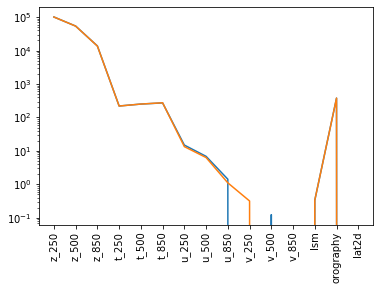

In [48]:
plt.plot(dg_train1.mean)
plt.plot(dg_train2.mean)
plt.yscale('log')
plt.xticks(range(15), dg_train1.mean.level_names.values, rotation=90);

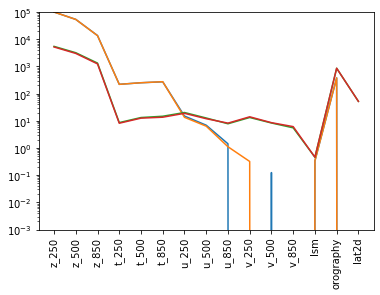

In [56]:
plt.plot(dg_train1.mean)
plt.plot(dg_train2.mean)
plt.plot(dg_train1.std)
plt.plot(dg_train2.std)
plt.yscale('log')
plt.ylim(1e-3, 1e5)
plt.xticks(range(15), dg_train1.mean.level_names.values, rotation=90);

In [60]:
dg_train1.batch_size

64

In [62]:
len(dg_train1), len(dg_train2)

(12, 12)

In [64]:
len(dg_train1.idxs), len(dg_train2.idxs)

(726, 726)

In [66]:
dgs=[dg_train1, dg_train2]

In [73]:
dg_train1[0][0].shape

(64, 32, 64, 15)

In [77]:
class CombinedDataGenerator(keras.utils.Sequence):
    """For now assumes same length"""
    def __init__(self, dgs, batch_size):
        self.dgs = dgs
        self.batch_size = batch_size
        assert batch_size % len(dgs) == 0, 'Batch size % number dgs must be zero.'
        for dg in dgs: dg.batch_size = batch_size // len(dgs)
        
    def __len__(self):
        total_samples = np.sum([len(dg.idxs) for dg in dgs])
        return int(np.ceil(total_samples / self.batch_size))
    
    def __getitem__(self, i):
        Xs = []; ys = []
        for dg in self.dgs:
            X, y = dg[i]
            Xs.append(X); ys.append(y)
        return np.concatenate(Xs), np.concatenate(ys)
    
    def on_epoch_end(self):
        for dg in dgs:
            dg.on_epoch_end()

In [78]:
cdg  = CombinedDataGenerator(dgs, 64)

In [79]:
cdg.dgs[0].batch_size

32

In [80]:
X, y = cdg[0]

In [81]:
X.shape

(64, 32, 64, 15)